In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df_a = pd.read_csv('./data/tennis_cleaned.csv')
df_b = pd.read_csv('./data/pickleball_cleaned.csv')
df_a.drop(columns='Unnamed: 0', inplace=True)
df_b.drop(columns='Unnamed: 0', inplace=True)

In [3]:
# top words using CountVectorizer

cvec = CountVectorizer(stop_words='english')
cvec.fit(df_a['title'])

len_features = len(cvec.get_feature_names())

df_a_cv = pd.DataFrame(cvec.transform(df_a['title']).todense(),columns=cvec.get_feature_names())

top_a = df_a_cv.sum(axis=0)

In [4]:
df_top_a = top_a.to_frame(name='count')
df_top_a['word'] = df_top_a.index
df_top_a.reset_index(drop=True, inplace=True)

cols = ['word','count']
df_top_a = df_top_a[cols]
df_top_a.sort_values(by='count',ascending=False, inplace=True)
df_top_a.head(10)

,word,count
5274,tennis,758
2154,final,434
105,2021,358
576,atp,352
1691,djokovic,349
3952,player,326
3720,open,300
3302,match,261
5833,win,227
1449,cup,211


In [5]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df_b['title'])

len_features = len(cvec.get_feature_names())
print(len_features)

df_b_cv = pd.DataFrame(cvec.transform(df_b['title']).todense(),columns=cvec.get_feature_names())

top_b = df_b_cv.sum(axis=0)

2829


In [6]:
# get top words in df_b

df_top_b = top_b.to_frame(name='count')
df_top_b['word'] = df_top_b.index
df_top_b.reset_index(drop=True, inplace=True)

cols = ['word','count']
df_top_b = df_top_b[cols]
df_top_b.sort_values(by='count',ascending=False, inplace=True)
df_top_b.head(10)

,word,count
1784,pickleball,819
1710,paddle,239
1823,play,121
988,game,108
1618,new,102
1826,player,92
734,double,91
567,court,82
252,ball,81
1894,pro,72


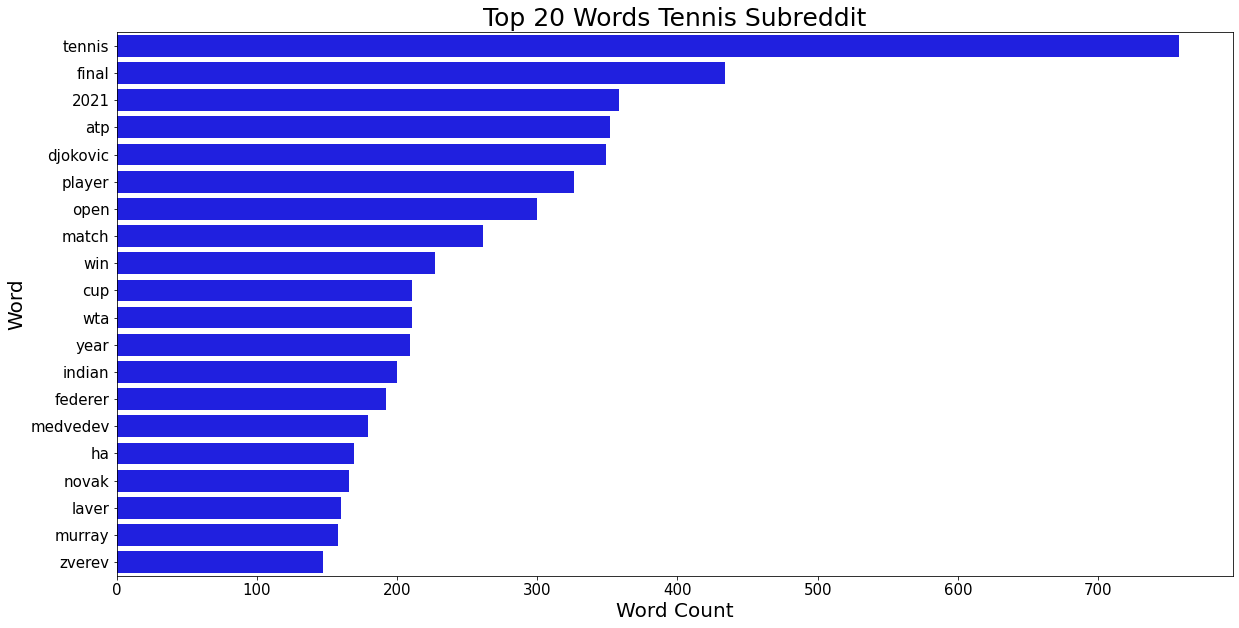

In [7]:
plt.figure(figsize=(20,10))
plt.title('Top 20 Words Tennis Subreddit',fontsize=25)

# sns.set_style("whitegrid")
sns.barplot(data=df_top_a.head(20),x='count',y='word', color='blue')

plt.xlabel('Word Count',fontsize=20)
plt.ylabel('Word',fontsize=20)
plt.tick_params(labelsize=15)

plt.savefig('./images/Tennis_20', bbox_inches='tight');

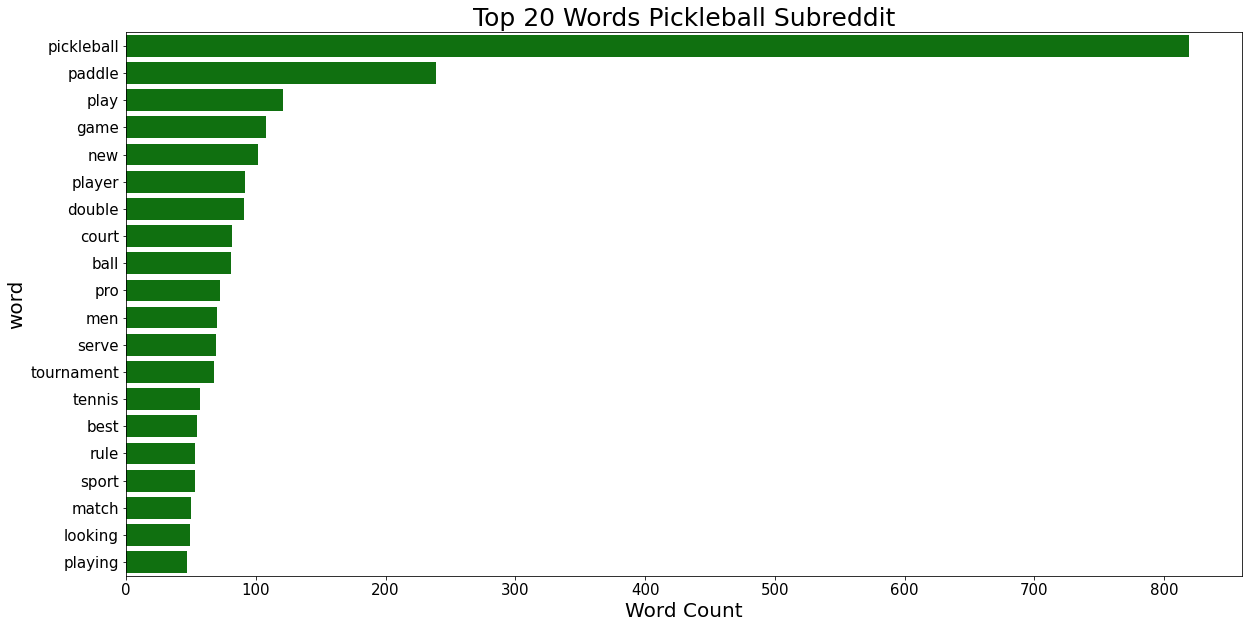

In [8]:
plt.figure(figsize=(20,10))
plt.title('Top 20 Words Pickleball Subreddit',fontsize=25)

sns.barplot(data=df_top_b.head(20),x='count',y='word', color='green')

plt.xlabel('Word Count',fontsize=20)
plt.ylabel('word',fontsize=20)
plt.tick_params(labelsize=15)

plt.savefig('./images/Pickleball_20', bbox_inches='tight');